In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from read_image import get_images, match_image, image_preview
from collections import defaultdict
%cd ..

/Users/daixinming/Library/CloudStorage/OneDrive-Personal/mito-pilot


## Data Set Size

In [3]:
tif_path_raw = './data/mitoraw_tifs/cmap15_P1_B3A_tifs'  # Path to tif raw data
tif_path_seg = './data/mitoseg_tifs/cmap15_P1_B3A_out'  # Path to tif segmented data
path_list = [tif_path_raw, tif_path_seg]
number_files = list()
for i in range(len(path_list)):
    lst = os.listdir(path_list[i])
    number_files.append(len(lst))
print("The number of images:",number_files)

The number of images: [4441, 4441]


### Raw Image Data
Examine the shape of the images. 
The ratio of zeros in the image.

In [4]:
# filter the images that only match the names in mitocontrolset
mito_data = pd.read_csv("./data/mitocontrolset.csv")
image_name = match_image(tif_path_raw, mito_data.loc[:, "cell_name"].tolist())
image_list = get_images(tif_path_raw, image_name)

In [6]:
# The shapes of the images
shapes = set()
for i in range(len(image_list)):
    if image_list[i].shape not in shapes:
        shapes.add(image_list[i].shape)
print(shapes)

zero_ratio = defaultdict(list)
for i in range(len(image_list)):
    zero_ratio[image_list[i].shape].append(len(image_list[i].nonzero()[0])/(image_list[i].shape[0])**2)

{(2048, 2048), (512, 512), (1024, 1024)}


The proprotion of zeros
(1024, 1024) mean: 0.23805372047424317 sd: 0.07449732067824864
(512, 512) mean: 0.4352550506591797 sd: 0.09438341830450017
(2048, 2048) mean: 0.09446128052059967 sd: 0.027492197320519274


Text(0, 0.5, 'Density')

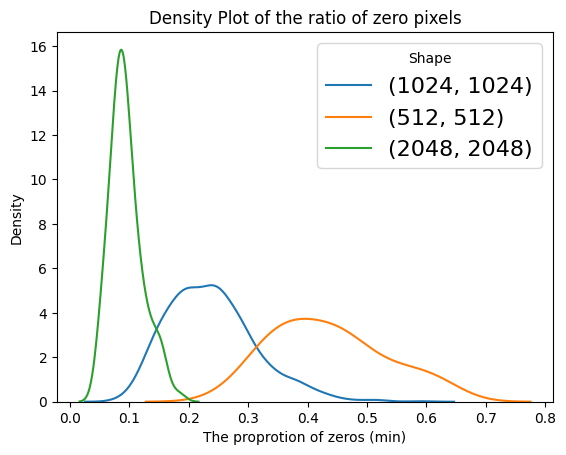

In [5]:
print("The proprotion of zeros")
for key, value in zero_ratio.items():
    mean = np.mean(value)
    sd = np.std(value)
    print(key, "mean:", mean, "sd:", sd)

# Draw the density plot
for key, value in zero_ratio.items():
    sns.kdeplot(value, label = str(key))
plt.legend(prop={'size': 16}, title = 'Shape')
plt.title('Density Plot of the ratio of zero pixels')
plt.xlabel('The proprotion of zeros (min)')
plt.ylabel('Density')

## Image Preview

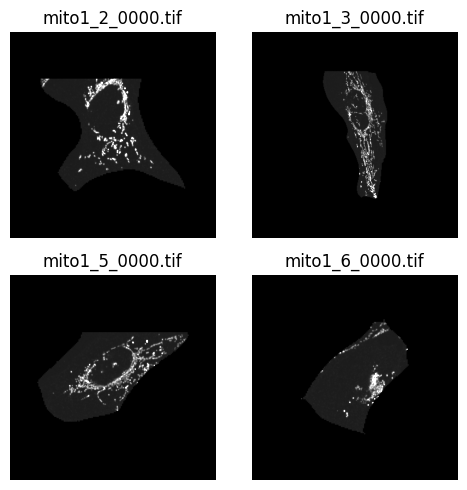

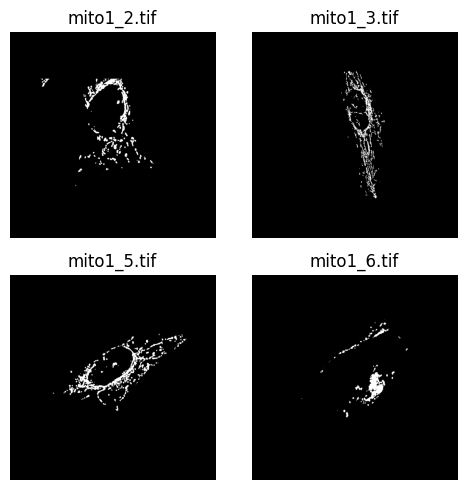

In [4]:
vmax = [1000, 1]
for i in range(len(path_list)):
    image_preview(path_list[i], vmax=vmax[i], number_shows=4)